In [1]:
%matplotlib inline

In [2]:
from itertools import permutations

import matplotlib.pyplot as plt
import nengo_spa as spa
import numpy as np
from scipy.ndimage import gaussian_filter1d
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

from cue.utils.plotting import *

In [3]:
style()

In [4]:
data = np.load('../../data/mixedsel/result.npz')

In [5]:
spikes = data['spikes']

In [6]:
dt = 0.001
f_spikes = gaussian_filter1d(spikes, 0.025 / dt, axis=1)
t = np.arange(spikes.shape[1]) * dt

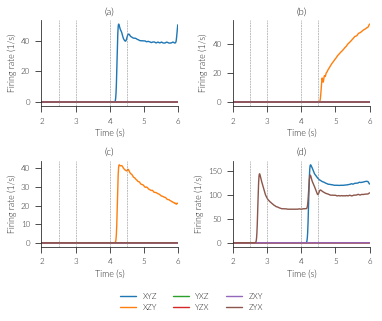

In [7]:
fig = plt.figure(figsize=(textwidth, 2 * row_height))
     
ax = None
for i, neuron_idx in enumerate([254, 966, 635, 2]):
    ax = fig.add_subplot(2, 2, i + 1, sharex=ax)
    for j, seq in zip(range(6), permutations('XYZ')):
        ax.plot(t, f_spikes[j, :, neuron_idx], label=''.join(seq))
    ax.set_title("({})".format('abcd'[i]))
    for x in [2.5, 3., 4., 4.5]:
        ax.axvline(x=x, ls='--', c='gray', lw=0.5)
    ax.set_xlim(2., 6.)
    ax.set_ylabel("Firing rate (1/s)")
    ax.set_xlabel("Time (s)")

fig.legend(
    *ax.get_legend_handles_labels(),
    loc='upper center', bbox_to_anchor=(0.5, 0.11),
        bbox_transform=fig.transFigure, ncol=3)
    
sns.despine(fig)
fig.tight_layout(rect=(0., 0.1, 1., 1.))

In [8]:
save_tight_fig(fig, '../../../phd-thesis/figures/seqsel.pdf')